In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
np.random.seed(2)
import os
import cv2
import random 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import gzip 
import struct 
import matplotlib.pyplot as plt
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
#Setting the Theme of the data visualizer Seaborn
sns.set(style="dark",context="notebook",palette="muted")

C:\Users\Mel\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_images(filename):
    # Open the file
    with gzip.open(filename, 'rb') as f:
        # Read the header information
        magic_number = int.from_bytes(f.read(4), 'big')
        number_of_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        columns = int.from_bytes(f.read(4), 'big')
        # Read the image data
        buffer = f.read()
        images = np.frombuffer(buffer, dtype=np.uint8).reshape(number_of_images, rows, columns)
    return images

def load_labels(filename):
    # Open the file
    with gzip.open(filename, 'rb') as f:
        # Read the header information
        magic_number = int.from_bytes(f.read(4), 'big')
        number_of_labels = int.from_bytes(f.read(4), 'big')
        # Read the label data
        buffer = f.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
    return labels

In [12]:
# File paths to the hand-written digits data
train_images_path = 'Resources/train-images-idx3-ubyte.gz'
train_labels_path = 'Resources/train-labels-idx1-ubyte.gz'
test_images_path = 'Resources/t10k-images-idx3-ubyte.gz'
test_labels_path = 'Resources/t10k-labels-idx1-ubyte.gz'

# Load the data
X_train = load_images(train_images_path)
y_train = load_labels(train_labels_path)
test_images = load_images(test_images_path)
test_labels = load_labels(test_labels_path)
X_test, X_cv, y_test, y_cv = train_test_split(test_images, test_labels, test_size=0.1, random_state=42)
X_train = X_train/255.0 
X_test = X_test/255.0 
X_cv = X_cv/255.0
# Print the shapes to verify the data
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Training Labels Shape: (60000,)
Test Images Shape: (27561, 28, 28)
Test Labels Shape: (27561,)


In [19]:
model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(28, 28, 1)),
    # First Convolutional Block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3, 3)),
    # Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 720)                 │       1,475,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 360)                 │         259,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           3,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,256,930 (20.05 MB)

 Trainable params: 5,256,930 (20.05 MB)

 Non-trainable params: 0 (0.00 B)

model.fit(X_train,y_train)

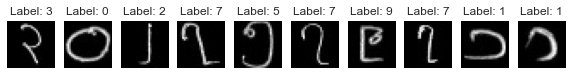

In [20]:
# Selecting a few images to observe better 
num_images_to_show = 10
indices = np.random.choice(len(X_cv), num_images_to_show, replace=False)

plt.figure(figsize=(10, 2))

for i, idx in enumerate(indices):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28 pixels
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.show()


In [22]:
model.fit(X_train,y_train, validation_data=(X_cv, y_cv), epochs=3, batch_size=50)

Epoch 1/3


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(50, 28, 28), dtype=float32). Expected shape (None, 784), but input has incompatible shape (50, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(50, 28, 28), dtype=float32)
  • training=True
  • mask=None

In [16]:
#evaluate accuracy on test set
test_loss, test_accuracy = model.evaluate(test_images,test_labels)

862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8040 - loss: 198.5704


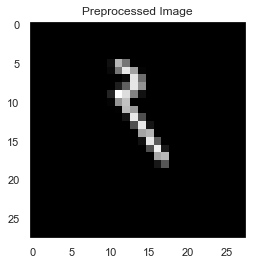

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 1.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


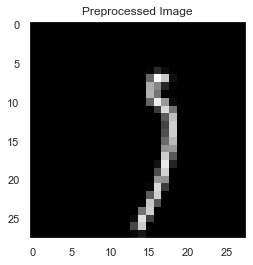

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 1.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


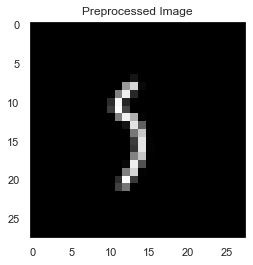

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 1.0000
Digit 9: 0.0000


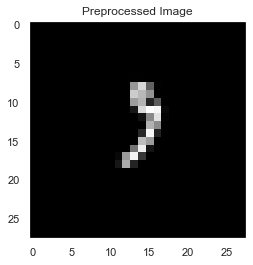

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 1.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


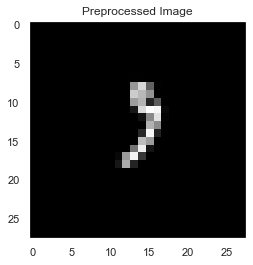

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 1.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


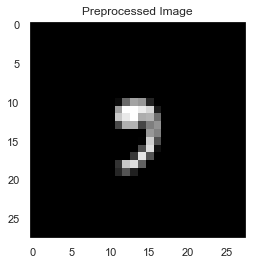

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 1.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


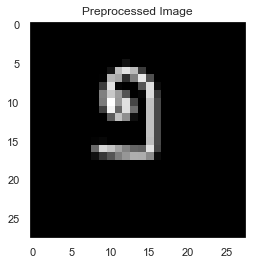

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 1.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


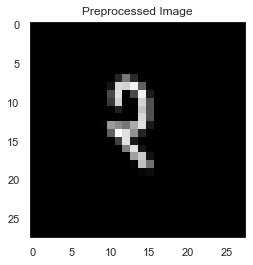

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 1.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


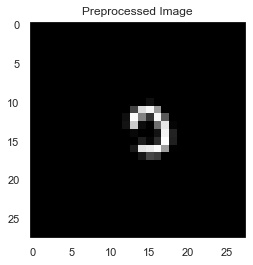

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 1.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


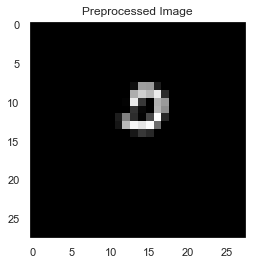

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0004
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.9996


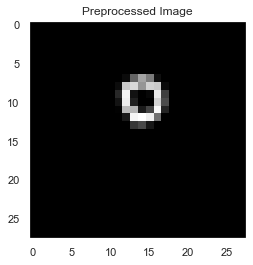

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 1.0000


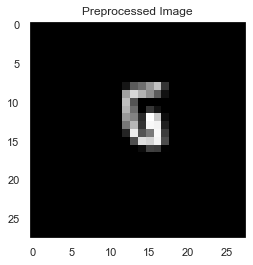

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 1.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


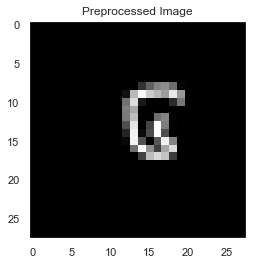

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 1.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


In [17]:
class DigitRecognizerApp:
    def __init__(self, model):
        self.model = model
        self.window = tk.Tk()
        self.window.title("Digit Recognizer")
        self.canvas = tk.Canvas(self.window, width=200, height=200, bg='white')
        self.canvas.grid(row=0, column=0, pady=2, sticky=tk.W, columnspan=2)
        self.button_predict = tk.Button(self.window, text="Predict", command=self.predict_digit)
        self.button_predict.grid(row=1, column=0, pady=2, padx=2)
        self.button_clear = tk.Button(self.window, text="Clear", command=self.clear_canvas)
        self.button_clear.grid(row=1, column=1, pady=2, padx=2)
        self.label_result = tk.Label(self.window, text="Draw a digit and click Predict", font=("Helvetica", 16))
        self.label_result.grid(row=2, column=0, columnspan=2)
        self.canvas.bind("<B1-Motion>", self.draw)
        self.image = Image.new("L", (200, 200), 255)
        self.draw_image = ImageDraw.Draw(self.image)

    def draw(self, event):
        x, y = event.x, event.y
        r = 3
        self.canvas.create_oval(x-r, y-r, x+r, y+r, fill="black")
        self.draw_image.ellipse([x-r, y-r, x+r, y+r], fill="black")

    def clear_canvas(self):
        self.canvas.delete("all")
        self.draw_image.rectangle((0, 0, 200, 200), fill="white")
        self.label_result.config(text="Draw a digit and click Predict")

    def predict_digit(self):
    # Convert the canvas to an image
        image = self.image.convert('L')  # Convert to grayscale ('L' mode)
    # Resize the image to 28x28 pixels, as the model expects
        image_resized = image.resize((28, 28))
    # Invert the image (MNIST digits are white on black background)
        image_inverted = ImageOps.invert(image_resized)
    # Convert the image to a numpy array and normalize it
        image_array = np.array(image_inverted) # Normalize to [0, 1]
    # Reshape the array to match the input shape expected by the model
        image_array = image_array.reshape(-1, 28, 28, 1)
    # Visualize the preprocessed image before prediction (optional for debugging)
        plt.imshow(image_array.reshape(28, 28), cmap='gray')
        plt.title("Preprocessed Image")
        plt.show()
    # Predict the digit using the trained model
        prediction = self.model.predict(image_array)
    # Print the probabilities for each digit
        for i, prob in enumerate(prediction[0]):
            print(f"Digit {i}: {prob:.4f}")
    # Determine the most likely digit
        digit = np.argmax(prediction)
    # Update the result label with the predicted digit
        self.label_result.config(text=f"Predicted Digit: {digit}")
        
    def run(self):
        self.window.mainloop()

# Create and run the application
app = DigitRecognizerApp(model)
app.run()
